In [1]:
#Dependencies
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import squarify
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
import numpy as np
import seaborn as sns

sns.set_style("white")

from pprint import pprint
from config import api_key

#Convert Gold Tier 1 URL to DF
gold_url = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/I?page=1&api_key=" + api_key
gold_data = requests.get(gold_url).json()
gold_data_df = pd.DataFrame(gold_data)

#Convert Gold Tier 2 URL to DF
gold_url2 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/II?page=1&api_key=" + api_key
gold_data2 = requests.get(gold_url2).json()
gold_data_df2 = pd.DataFrame(gold_data2)

#Convert Gold Tier 3 URL to DF
gold_url3 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/III?page=1&api_key=" + api_key
gold_data3 = requests.get(gold_url3).json()
gold_data_df3 = pd.DataFrame(gold_data3)

#Convert Gold Tier 4 URL to DF
gold_url4 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/IV?page=1&api_key=" + api_key
gold_data4 = requests.get(gold_url4).json()
gold_data_df4 = pd.DataFrame(gold_data4)

#Merge all DF into one using Concat
GDF = [gold_data_df, gold_data_df2, gold_data_df3, gold_data_df4]
gold_df = pd.concat(GDF)

#Drop unneeded columns - Clean Gold DF
clean_gold_df = gold_df.drop(columns=['queueType', 'summonerName', 'inactive', 'freshBlood', 'hotStreak', 'miniSeries'])

#Add all Gold summoner ids to a list
gold_summonerId_list = list(gold_df['summonerId'])

#Convert Platinum Tier 1 URL to DF
platinum_url = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/I?page=1&api_key=" + api_key
platinum_data = requests.get(platinum_url).json()
platinum_data_df = pd.DataFrame(platinum_data)

#Convert Platinum Tier 2 URL to DF
platinum_url2 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/II?page=1&api_key=" + api_key
platinum_data2 = requests.get(platinum_url2).json()
platinum_data_df2 = pd.DataFrame(platinum_data2)

#Convert Platinum Tier 3 URL to DF
platinum_url3 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/III?page=1&api_key=" + api_key
platinum_data3 = requests.get(platinum_url3).json()
platinum_data_df3 = pd.DataFrame(platinum_data3)

#Convert Platinum Tier 4 URL to DF
platinum_url4 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/IV?page=1&api_key=" + api_key
platinum_data4 = requests.get(platinum_url4).json()
platinum_data_df4 = pd.DataFrame(platinum_data4)

#Merge all DF into one using Concat
PDF = [platinum_data_df, platinum_data_df2, platinum_data_df3, platinum_data_df4]
platinum_df = pd.concat(PDF)

#Drop unneeded columns - Clean Platinum DF
clean_platinum_df = platinum_df.drop(columns=['queueType', 'summonerName', 'inactive', 'freshBlood', 'hotStreak', 'miniSeries'])

#Add all platinum summoner ids to a list
platinum_summonerId_list = list(platinum_df['summonerId'])

In [5]:
#Looping through top 100 summoners in Gold Tier and outputting data for champion they last used.
gold_summonerId = gold_summonerId_list[:100]

first_championID_list_gold = []
for i in gold_summonerId:
    gold_url2 = "https://na1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/" + i + "?api_key=" + api_key
    response = requests.get(gold_url2).json()
    first_championID_gold = response[0]
    first_championID_list_gold.append(first_championID_gold)
    
first_championID_list_gold_DF = pd.DataFrame(first_championID_list_gold)


,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,chestGranted,tokensEarned,summonerId
0,412,7,153480,1602440759000,131880,0,True,0,kL8pVCm74gk3Tm1cRPOFMztqrOdkwqbTTpunQjRAN16K2rwW
1,8,7,131130,1601102548000,109530,0,True,0,7E1B5_95CH00tnlSx1DPV9ACNyEc0lp-ktfN652M5nrGwXDf
2,40,7,318319,1603318289000,296719,0,True,0,JrPPcFTJRcc2y2td98f4tnjDW0bD0QDCtgCp2IwkVc0QdvR5
3,127,6,185664,1603524337000,164064,0,True,3,la3_GRsc9J9gN-WCJSFhKAlCXfaZrsV5P0AYWSZCjDAX-is2
4,64,6,117672,1597728713000,96072,0,True,2,v1au8CnEEwKnR3O9vAy87BLyUkLbh21PBvvfuM0UmgrdVw89
...,...,...,...,...,...,...,...,...,...
95,412,6,48165,1582506180000,26565,0,False,2,4bLLlJnCwzsEKGJkRt4LCA2LH6ROr8sO1G1PDQXtSEDVPzqr
96,350,6,190251,1602713330000,168651,0,True,3,PY85Sa-WiUWpVXtgyWsx948wusQcBeTlRzv8eoln5ry43o6g
97,86,7,142175,1596409513000,120575,0,True,0,wrVltAGHHoGAfCK_UebANrjp_fhNNReRFaBfpXS9g2b9X3LC
98,145,7,107244,1603513387000,85644,0,True,0,gnNixogHY5kBFwnKnTHWiLMJ6bA_sANeZoFZz7fmHnyDvqa0


In [8]:
#Looping through top 100 summoners in Platinum Tier and outputting data for champion they last used.
platinum_summonerId = platinum_summonerId_list[:100]

first_championID_list_platinum = []
for j in platinum_summonerId:
    platinum_url2 = "https://na1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/" + j + "?api_key=" + api_key
    response2 = requests.get(platinum_url2).json()
    first_championID_platinum = response2[0]
    first_championID_list_platinum.append(first_championID_platinum)
    
first_championID_list_plat_DF = pd.DataFrame(first_championID_list_platinum)

first_championID_list_plat_DF

,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,chestGranted,tokensEarned,summonerId
0,37,7,673126,1585886315000,651526,0,True,0,b4h6IfSFfV1HGoqCTqKRoBuT6DLuRCFq6dLTGMhN0VF_4I8y
1,121,5,70094,1603585841000,48494,0,True,2,HkC5-BPZ_UK0-8WIt5o0V3EHSI0-DBZnWwKehVV6d_WG0uhQ
2,59,6,72620,1590401842000,51020,0,True,1,u77KfuIbs3RNRfbOiLzmXpZ14y7FNE_48ftRI89bAqm2QVt-
3,76,7,53396,1599539212000,31796,0,True,0,mV-w51K_z-T73eU3RktA3fLABBTpTVSZboKfXeUwrVZyne4l
4,8,7,156718,1601684389000,135118,0,True,0,45b8LY65Z7GRd7S3DqOFUuO_Nsiq5sRViWqP8Oqpz9ZAmBvW
...,...,...,...,...,...,...,...,...,...
95,51,7,96926,1599165379000,75326,0,True,0,4Kv241JNmDaGiWRoBR2oGjmcrQkLTv_qG7ndyjQZCdjttmfl
96,120,5,57459,1593203889000,35859,0,True,2,QOSz4IRHVlID1uS76kdeLqq6Icd98t5zAyyGzoRCgdyBZwx1
97,145,6,50414,1603184272000,28814,0,True,1,tAqq0UDOqodGIpEQ9xtCFGJRLQO_7Q8mNXh_Ont-aYIybs3I
98,517,5,38448,1596219033000,16848,0,True,2,5UOzhDEfClpFso93JJS8mHzQfZ1NyDsVqa2LeOWjShyKsR7Z


In [51]:
#Pull Data from DataDragon to create DF of Champion name with their ChampionID
champions_data = pd.read_json(r'file:///Users/jw/Downloads/dragontail-10.21.1/10.21.1/data/en_US/champion.json')

#Initialising_dictionary
champion_dict = champions_data['data']

#Split Dictionary into Keys and Values
character = []
values = []
items = champion_dict.items()
for item in items:
    character.append(item[0]), values.append(item[1])

ID = []
for v in values:
    ID.append(v['key'])

Role = []
for x in values:
    Role.append(x['tags'][0])

champion_data_1 = pd.DataFrame({"Champion Name": character, "championId": ID, "Primary Role": Role})

#change data type to int64 - in order to merge 
champion_data_1['championId'] = champion_data_1['championId'].astype(str).astype(int).round(0)

In [71]:
#Make full gold DF - ready for analysis
full_summoner_mastery = pd.read_csv('summoner_champion.csv')

final_gold_df = full_summoner_mastery[full_summoner_mastery["tier"] == "GOLD"]

gold_combined_df = pd.merge(final_gold_df, champion_data_1, how = 'left', on = 'championId')

del gold_combined_df["Champion Name_x"]

gold_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)


(0.0, 100.0, 0.0, 100.0)

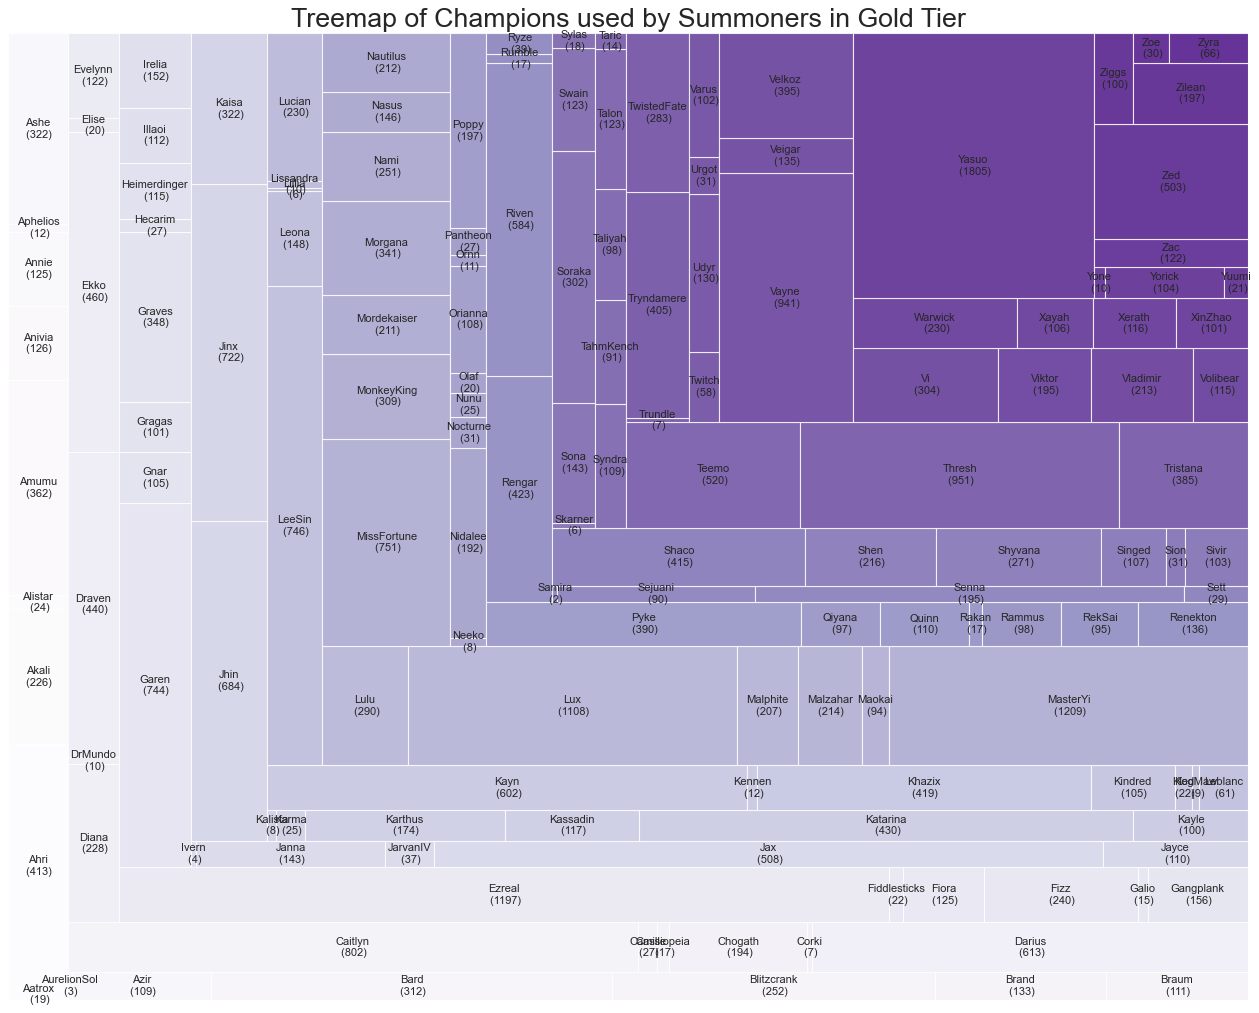

In [163]:
#TreeMap of Summoners in Gold Tier
treemap_1 = gold_combined_df.groupby('Champion Name').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('Purples')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Gold Tier', fontsize=24)
plt.axis('off')


#plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Full_Gold_Treemap.png")

In [172]:
#Average amount of wins for summoner in Gold Tier
gold_wins_avg = gold_combined_df['wins'].mean()
#Average amount of losses for summoner in Gold Tier
gold_loss_avg = gold_combined_df['losses'].mean()

In [175]:
## Broken - trying to change champion name datatype to int in order to run mean, mode, median
#gold_combined_df['Champion Name'] = gold_combined_df['Champion Name'].astype(str).astype(int).round(0)

#gold_combined_df.dtypes

In [174]:
## Broken - trying to change champion name datatype to int in order to run mean, mode, median
#gold_combined_df['Champion Name'] = gold_combined_df['Champion Name'].astype(str)

#df = gold_combined_df['Champion Name']

#df.count[0]

In [41]:
#Make full platinum DataFrame - everything we need for analysis
final_platinum_df = full_summoner_mastery[full_summoner_mastery["tier"] == "PLATINUM"]

#Merge full platinum DF with champion data
platinum_combined_df = pd.merge(final_platinum_df, champion_data_1, how = 'left', on = 'championId')

#Delete duplicate column
del platinum_combined_df["Champion Name_x"]

#Rename column
platinum_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

(0.0, 100.0, 0.0, 100.0)

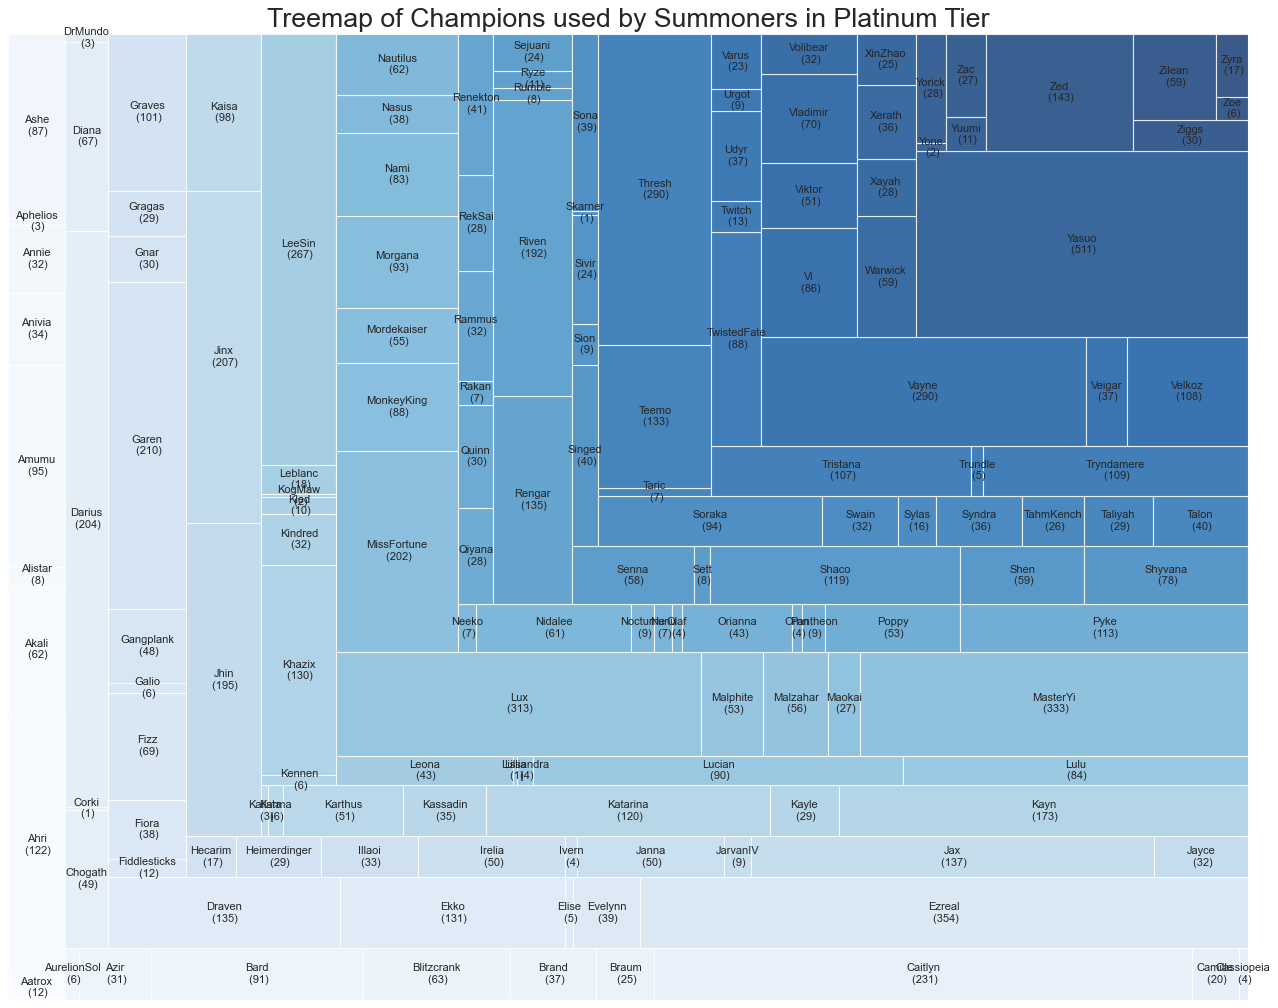

In [156]:
#Make Treemap of Champions used by summoners in Platinum Tier
treemap_1 = platinum_combined_df.groupby('Champion Name').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('Blues')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Platinum Tier', fontsize=24)
plt.axis('off')

#plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Full_Platinum_Treemap.png")

In [42]:
#Make Full Iron DF - Ready for analysis
final_iron_df = full_summoner_mastery[full_summoner_mastery["tier"] == "IRON"]

iron_combined_df = pd.merge(final_iron_df, champion_data_1, how = 'left', on = 'championId')

del iron_combined_df["Champion Name_x"]

iron_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)


(0.0, 100.0, 0.0, 100.0)

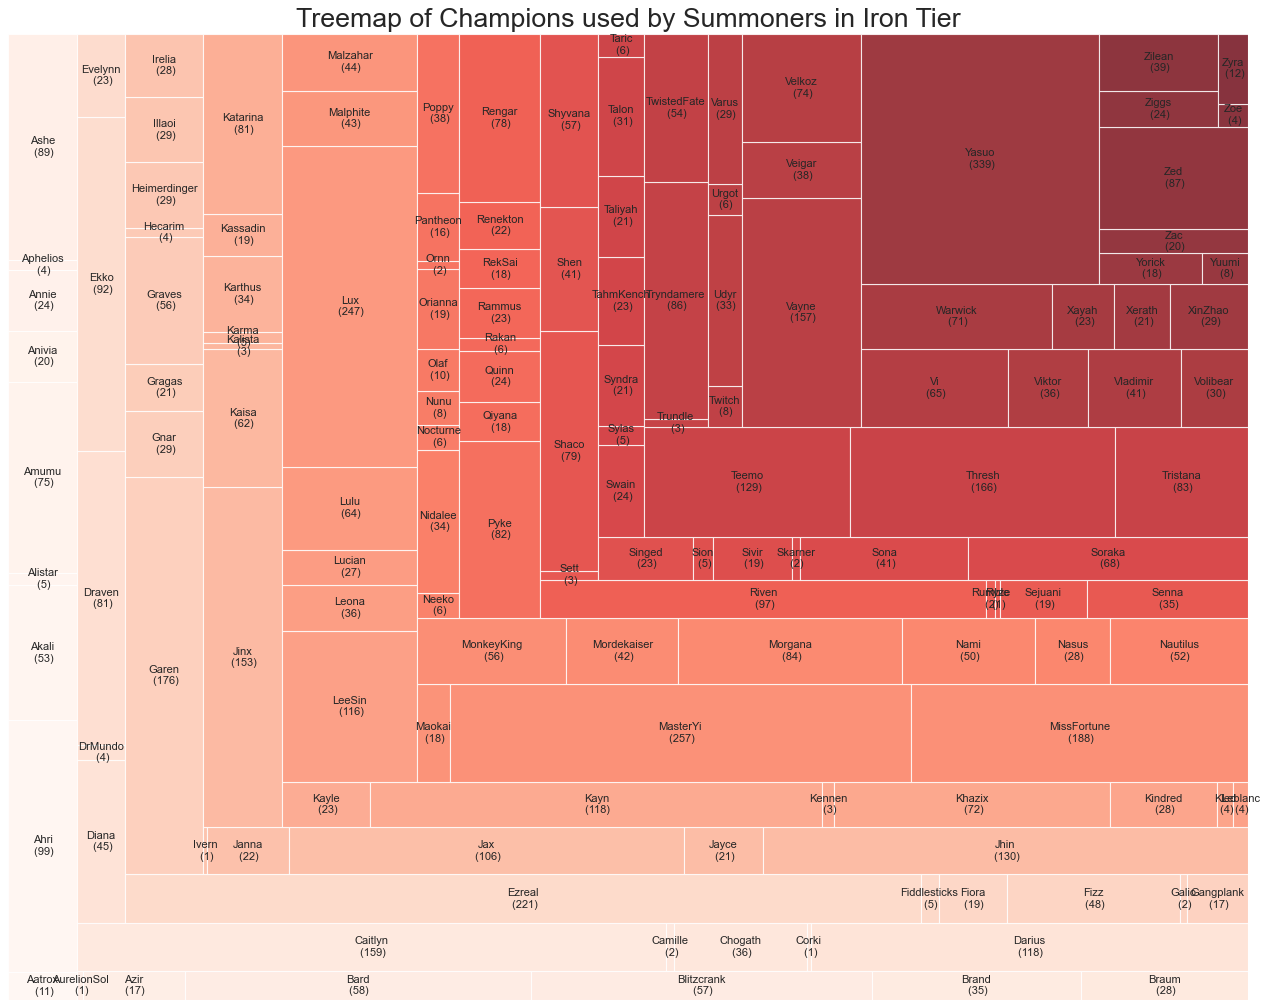

In [160]:
#Make Iron Iron TreeMap
treemap_1 = iron_combined_df.groupby('Champion Name').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('Reds')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Iron Tier', fontsize=24)
plt.axis('off')

In [44]:
#Make Full bronze DF - ready for analysis
final_bronze_df = full_summoner_mastery[full_summoner_mastery["tier"] == "BRONZE"]

bronze_combined_df = pd.merge(final_bronze_df, champion_data_1, how = 'left', on = 'championId')

del bronze_combined_df["Champion Name_x"]

bronze_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

(0.0, 100.0, 0.0, 100.0)

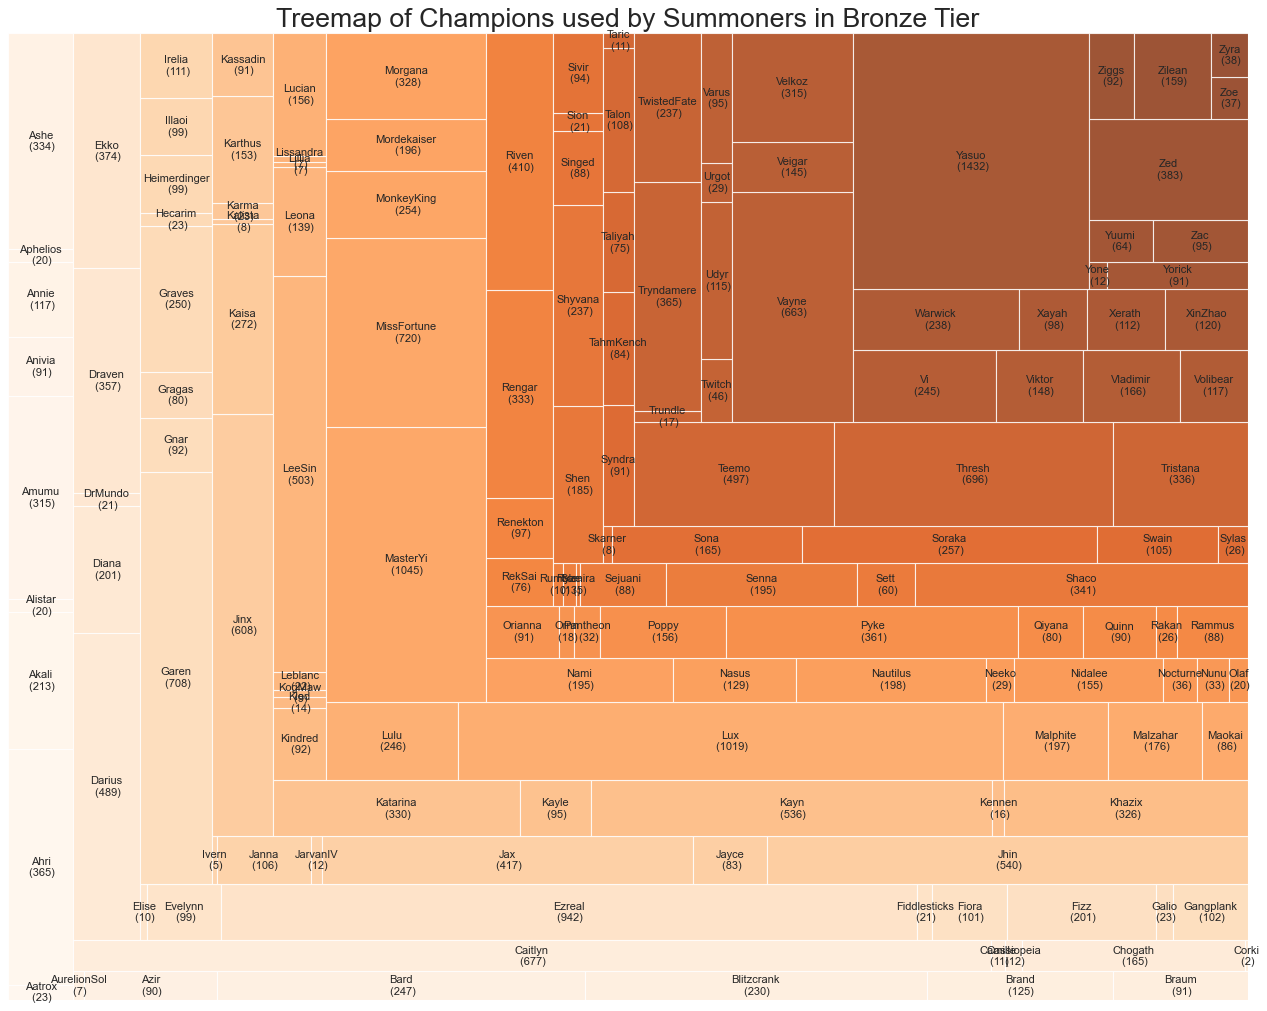

In [152]:
#Bronze TreeMap
treemap_1 = bronze_combined_df.groupby('Champion Name').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('Oranges')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Bronze Tier', fontsize=24)
plt.axis('off')

In [47]:
#Full Silver DataFrame
final_silver_df = full_summoner_mastery[full_summoner_mastery["tier"] == "SILVER"]
silver_combined_df = pd.merge(final_silver_df, champion_data_1, how = 'left', on = 'championId')

del silver_combined_df["Champion Name_x"]

silver_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

(0.0, 100.0, 0.0, 100.0)

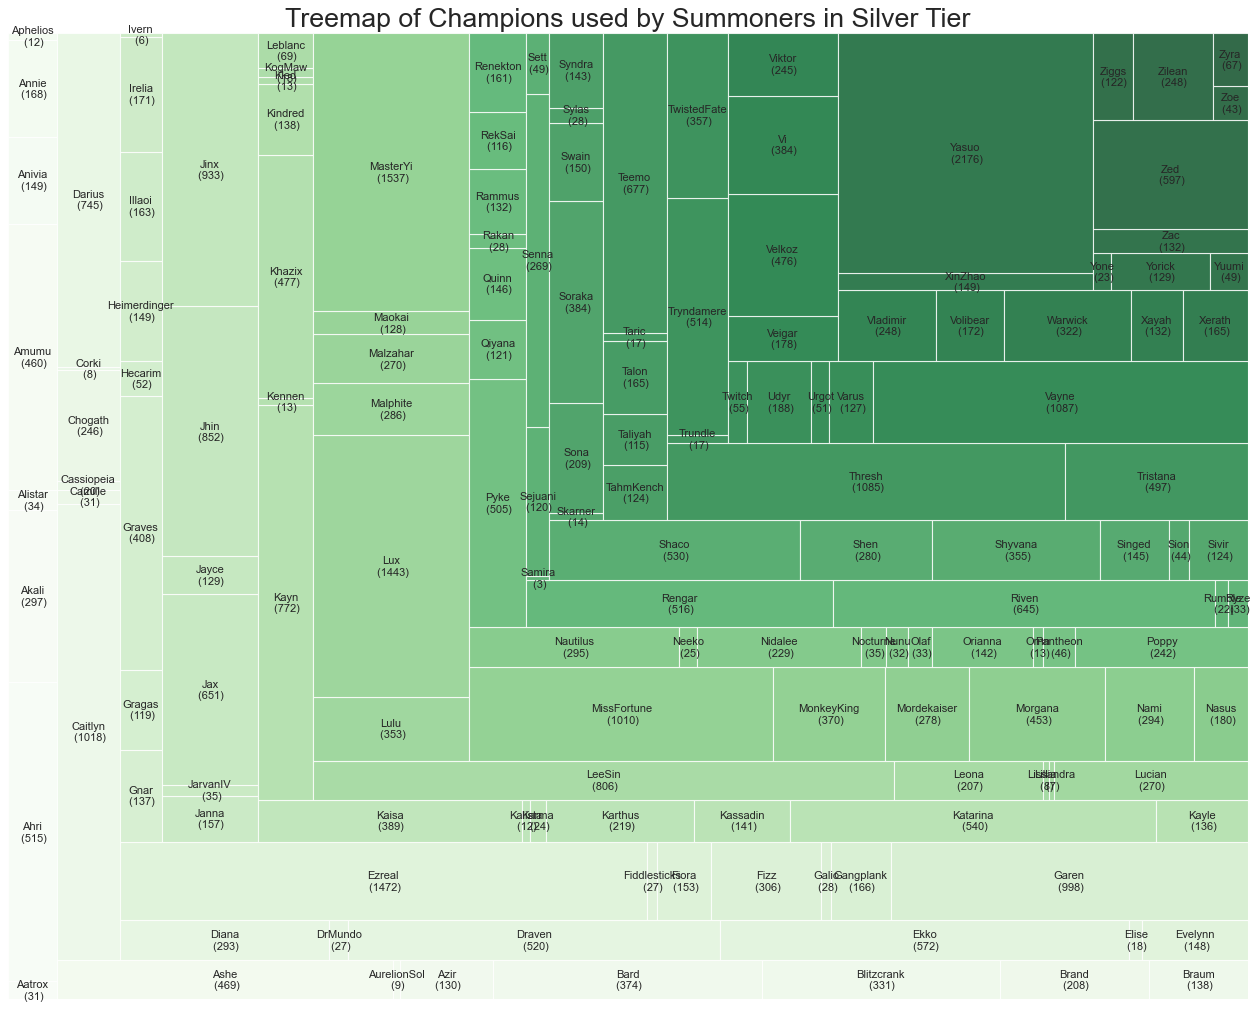

In [176]:
#Silver TreeMap
treemap_1 = silver_combined_df.groupby('Champion Name').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('Greens')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Silver Tier', fontsize=24)
plt.axis('off')

In [177]:
#Full DataFrame for Diamond, Master, GrandMaster and Challenger - combined into one
Diamond = full_summoner_mastery[full_summoner_mastery["tier"] == "DIAMOND"]
Master = full_summoner_mastery[full_summoner_mastery["tier"] == "MASTER"]
Grandmaster = full_summoner_mastery[full_summoner_mastery["tier"] == "GRANDMASTER"]
Challenger = full_summoner_mastery[full_summoner_mastery["tier"] == "CHALLENGER"]

DMGC = [Diamond, Master, Grandmaster, Challenger]
DMGC_df = pd.concat(DMGC)

DMGC_combined_df = pd.merge(DMGC_df, champion_data_1, how = 'left', on = 'championId')


del DMGC_combined_df["Champion Name_x"]

DMGC_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)


(0.0, 100.0, 0.0, 100.0)

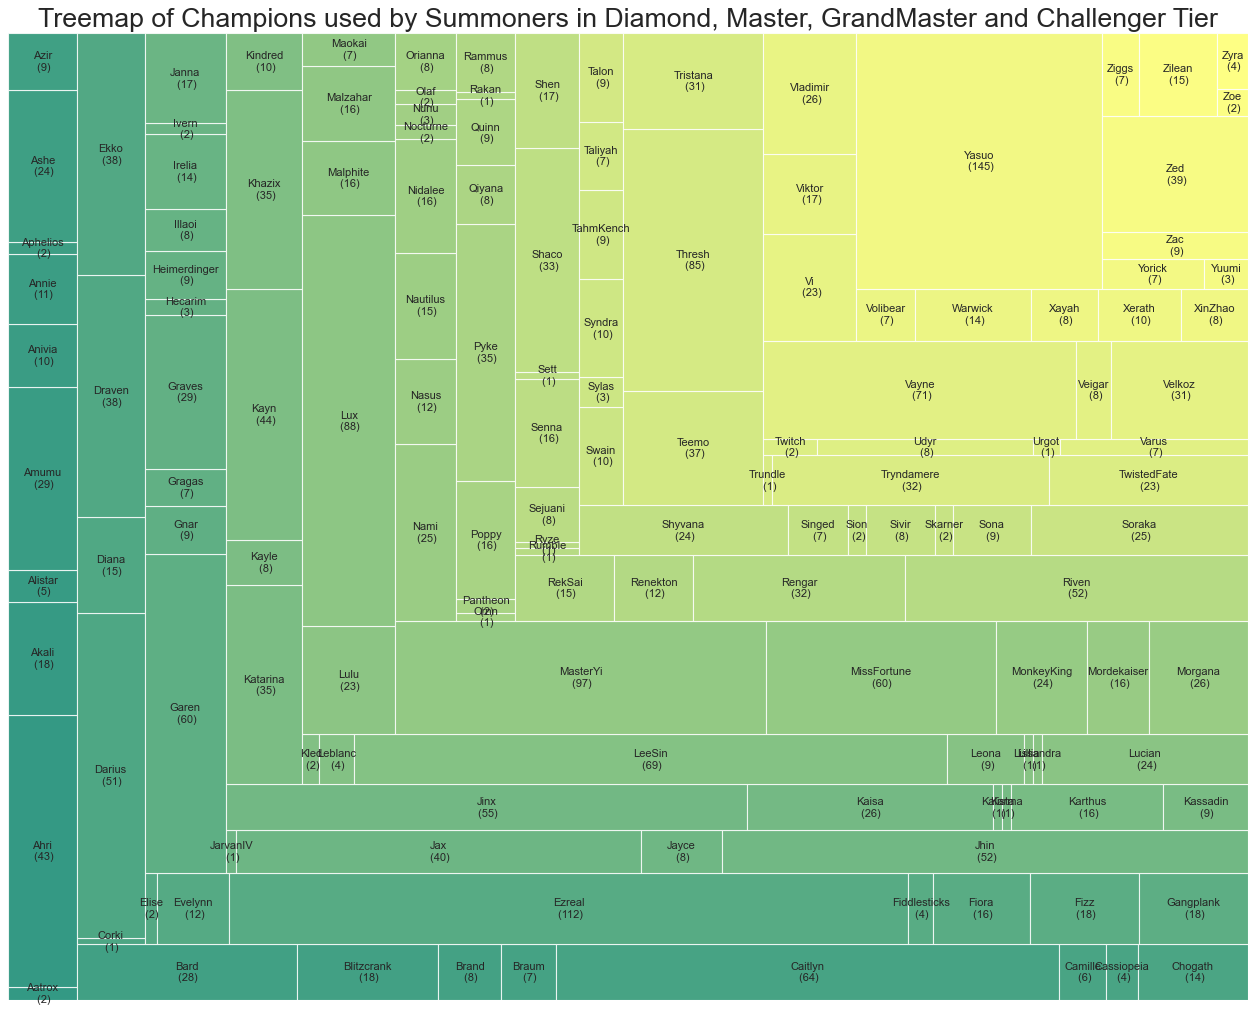

In [164]:
#TreeMap for Diamond, Master, GrandMaster and Challenger Tier
treemap_1 = DMGC_combined_df.groupby('Champion Name').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('summer')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Diamond, Master, GrandMaster and Challenger Tier', fontsize=24)
plt.axis('off')

(0.0, 100.0, 0.0, 100.0)

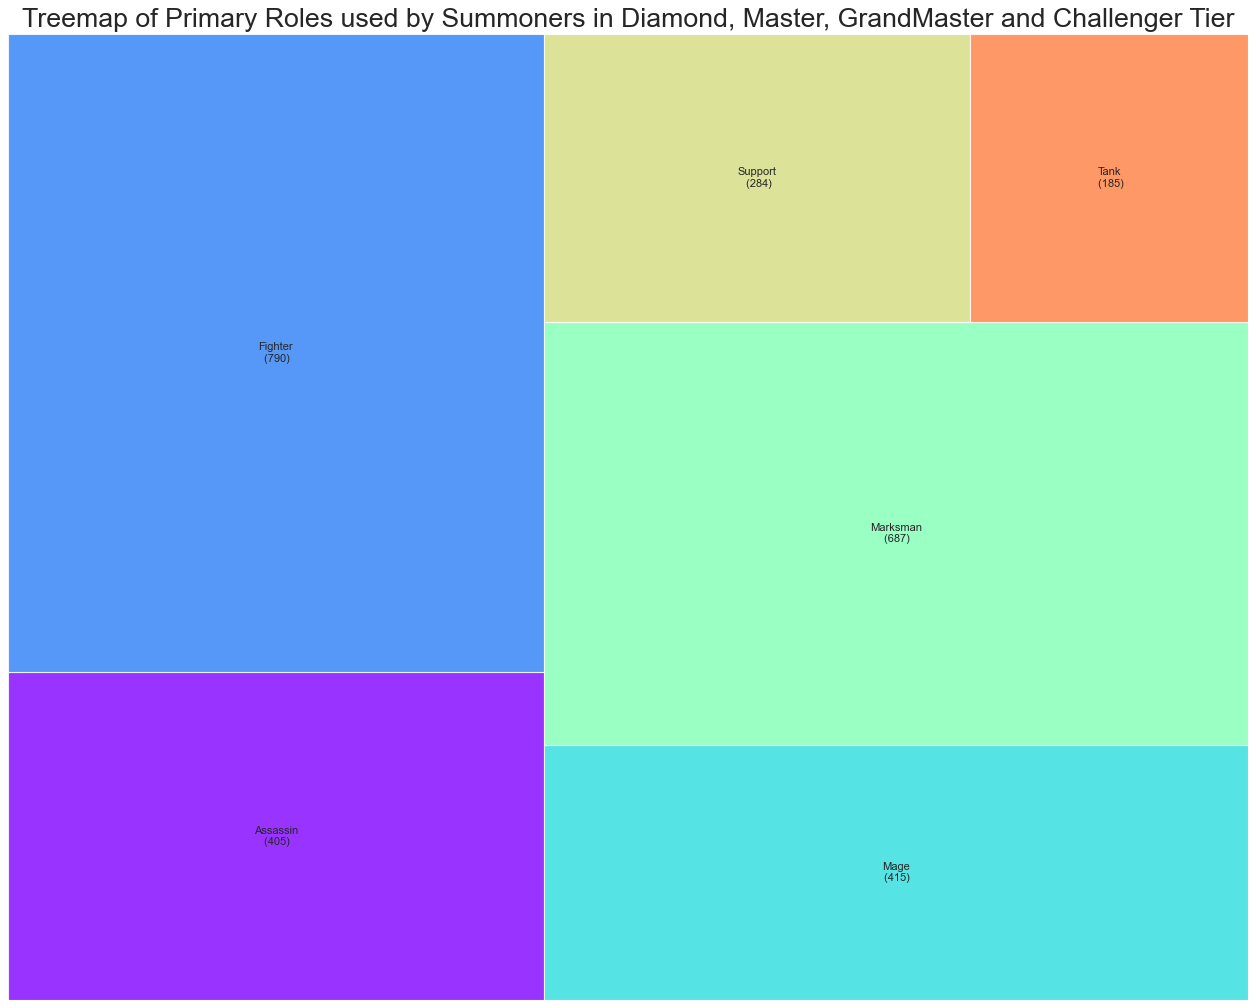

In [178]:
#TreeMap showing Primary Role used by summoners in Diamond, Master and GrandMaster Tier
treemap_1 = DMGC_combined_df.groupby('Primary Role').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('rainbow')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Primary Roles used by Summoners in Diamond, Master, GrandMaster and Challenger Tier', fontsize=24)
plt.axis('off')